In [218]:
#Raja-arvoja ylittäneiden asemien lähellä olevien reittien tarkastelua
import pandas as pd

In [219]:
df = pd.read_csv("routes_near_all_stations.csv")
stations = pd.read_csv("PM10_PM25_ylityspäivät_2024.csv")

In [220]:
stations["Date"] = pd.to_datetime(stations["Päivämäärä"], dayfirst=True)

In [221]:
import warnings
warnings.filterwarnings('ignore')
df["endTime"] = pd.to_datetime(df["endTime"])
df["startTime"] = pd.to_datetime(df["startTime"])
df["sendingTime"] = pd.to_datetime(df["sendingTime"])
duration_hours = (df["endTime"] - df["startTime"]).dt.total_seconds() / 3600

duration_by_day = duration_hours.groupby(df['endTime'].dt.to_period('d')).sum()
duration_by_hour = duration_hours.groupby(df['endTime'].dt.to_period('h')).sum()

durations = duration_hours.groupby(df['endTime']).sum()
duration_by_day.index = duration_by_day.index.to_timestamp()
duration_by_hour.index = duration_by_hour.index.to_timestamp()


In [222]:
PM10 = stations[stations["Komponentti"] == "PM10 24h"]

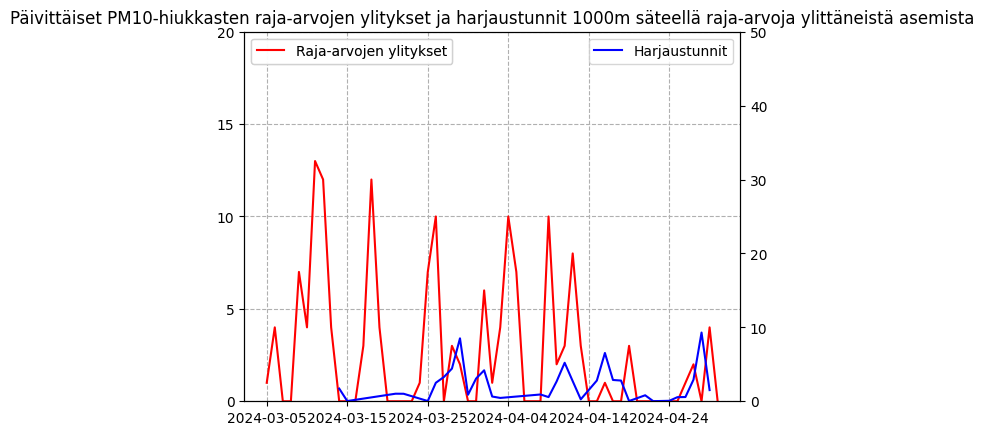

In [223]:
import matplotlib.pyplot as plt
idx = pd.date_range('03-05-2024', '04-30-2024')
day_counts = PM10.value_counts("Date").sort_index()
day_counts.index = pd.DatetimeIndex(day_counts.index)

day_counts = day_counts.reindex(idx, fill_value=0)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(day_counts, label="Raja-arvojen ylitykset", color="red")
ax2.plot(duration_by_day, label="Harjaustunnit", color="blue")
legend1 = ax1.legend(loc='upper left')
legend2 = ax2.legend(loc='upper right')
ax1.add_artist(legend1)
ax1.grid(linestyle="dashed")

xticks = idx[::10]
ax1.set_xticks(xticks)
ax1.set_yticks([0,5,10,15,20])
ax1.set_ylim(0,20)
ax2.set_ylim(0,50)
# ax2.set_xlim('03-05-2024', '04-23-2024')
plt.title("Päivittäiset PM10-hiukkasten raja-arvojen ylitykset ja harjaustunnit 1000m säteellä raja-arvoja ylittäneistä asemista")
plt.show()

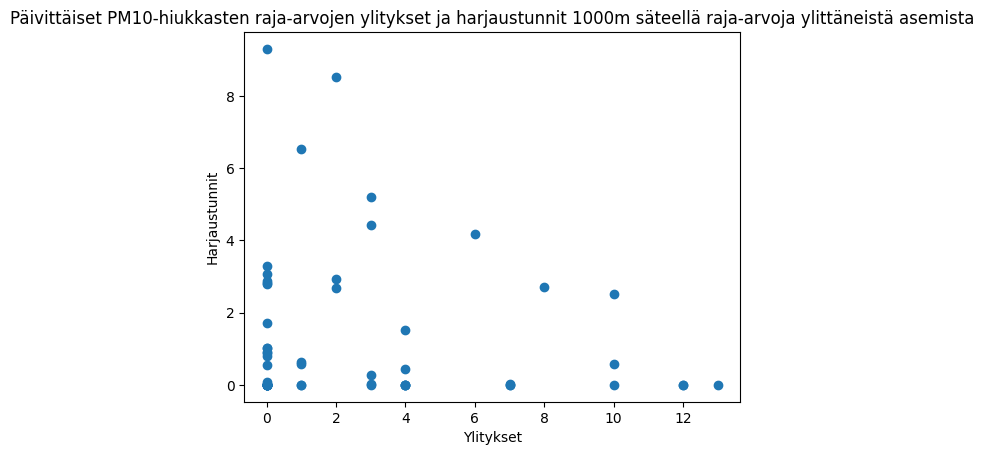

In [224]:
duration_by_day = duration_by_day.reindex(idx, fill_value=0)
plt.scatter(day_counts, duration_by_day)
plt.title("Päivittäiset PM10-hiukkasten raja-arvojen ylitykset ja harjaustunnit 1000m säteellä raja-arvoja ylittäneistä asemista")
plt.xlabel("Ylitykset")
plt.ylabel("Harjaustunnit")
plt.show()

In [225]:
duration_by_day.corr(day_counts)

-0.11087462002040788

In [226]:
m500 = df[df["500m"] == True]
duration_hours = (m500["endTime"] - m500["startTime"]).dt.total_seconds() / 3600

duration_by_day = duration_hours.groupby(m500['endTime'].dt.to_period('d')).sum()
duration_by_hour = duration_hours.groupby(m500['endTime'].dt.to_period('h')).sum()

durations = duration_hours.groupby(m500['endTime']).sum()
duration_by_day.index = duration_by_day.index.to_timestamp()
duration_by_hour.index = duration_by_hour.index.to_timestamp()

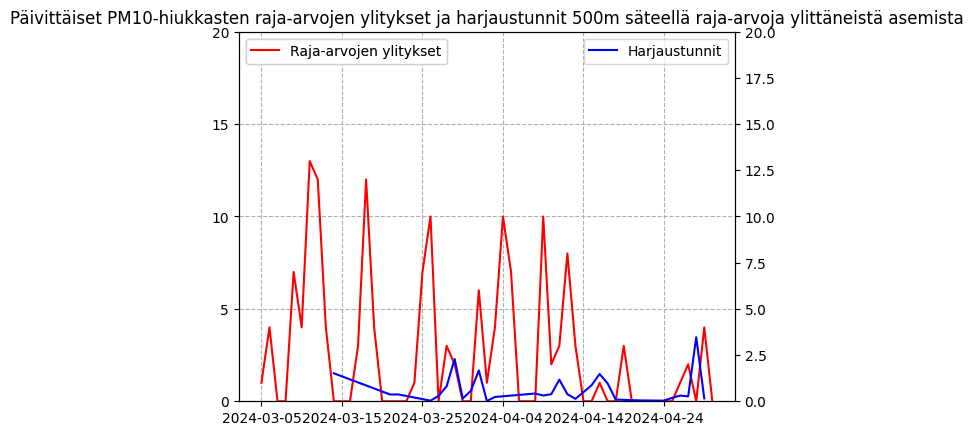

In [227]:
idx = pd.date_range('03-05-2024', '04-30-2024')
day_counts = PM10.value_counts("Date").sort_index()
day_counts.index = pd.DatetimeIndex(day_counts.index)

day_counts = day_counts.reindex(idx, fill_value=0)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(day_counts, label="Raja-arvojen ylitykset", color="red")
ax2.plot(duration_by_day, label="Harjaustunnit", color="blue")
legend1 = ax1.legend(loc='upper left')
legend2 = ax2.legend(loc='upper right')
ax1.add_artist(legend1)
ax1.grid(linestyle="dashed")

xticks = idx[::10]
ax1.set_xticks(xticks)
ax1.set_yticks([0,5,10,15,20])
ax1.set_ylim(0,20)
ax2.set_ylim(0,20)
# ax2.set_xlim('03-05-2024', '04-23-2024')
plt.title("Päivittäiset PM10-hiukkasten raja-arvojen ylitykset ja harjaustunnit 500m säteellä raja-arvoja ylittäneistä asemista")
plt.show()

In [228]:
m100 = df[df["100m"] == True]
duration_hours = (m100["endTime"] - m100["startTime"]).dt.total_seconds() / 3600

duration_by_day = duration_hours.groupby(m100['endTime'].dt.to_period('d')).sum()
duration_by_hour = duration_hours.groupby(m100['endTime'].dt.to_period('h')).sum()

durations = duration_hours.groupby(m100['endTime']).sum()
duration_by_day.index = duration_by_day.index.to_timestamp()
duration_by_hour.index = duration_by_hour.index.to_timestamp()

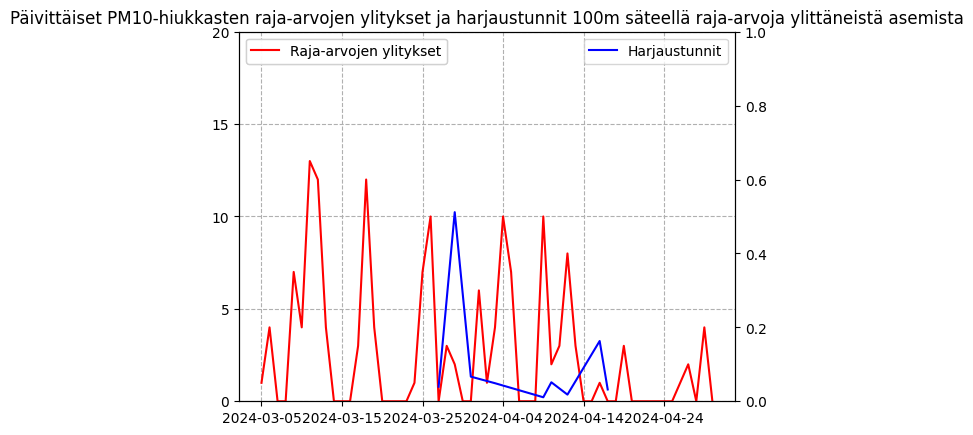

In [229]:
idx = pd.date_range('03-05-2024', '04-30-2024')
day_counts = PM10.value_counts("Date").sort_index()
day_counts.index = pd.DatetimeIndex(day_counts.index)

day_counts = day_counts.reindex(idx, fill_value=0)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(day_counts, label="Raja-arvojen ylitykset", color="red")
ax2.plot(duration_by_day, label="Harjaustunnit", color="blue")
legend1 = ax1.legend(loc='upper left')
legend2 = ax2.legend(loc='upper right')
ax1.add_artist(legend1)
ax1.grid(linestyle="dashed")

xticks = idx[::10]
ax1.set_xticks(xticks)
ax1.set_yticks([0,5,10,15,20])
ax1.set_ylim(0,20)
ax2.set_ylim(0,1)
# ax2.set_xlim('03-05-2024', '04-23-2024')
plt.title("Päivittäiset PM10-hiukkasten raja-arvojen ylitykset ja harjaustunnit 100m säteellä raja-arvoja ylittäneistä asemista")
plt.show()

In [230]:
# Korrelaatio jokaiselle ylitykselle
from datetime import date, timedelta
day = []
previous_day = []
all_days = []
test = []
#PM10 sisältää kaikki PM10 ylitykset
for i in range(len(PM10)):
 day.append(len(df[(df['Havaintoaseman nimi'] == PM10['Mittauspaikka'].iloc[i]) & (df['endTime'].dt.date == PM10['Date'].iloc[i].date())]))
 previous_day.append(len(df[(df['Havaintoaseman nimi'] == PM10['Mittauspaikka'].iloc[i]) & (df['endTime'].dt.date == PM10['Date'].iloc[i].date() - timedelta(days=1))]))
 all_days.append((df[(df['Havaintoaseman nimi'] == PM10['Mittauspaikka'].iloc[i])]))
 test.append(df["Havaintoaseman nimi"][(df['Havaintoaseman nimi'] == PM10['Mittauspaikka'].iloc[i]) & (df['endTime'].dt.date == PM10['Date'].iloc[i].date())])
#  print(f"Ylityspäivä: {PM10['Date'].iloc[i].date()} Paikka: {PM10['Mittauspaikka'].iloc[i]}")
#  print(f"Reittejä ylityspäivänä: {len(df[(df['Havaintoaseman nimi'] == PM10['Mittauspaikka'].iloc[i]) & (df['endTime'].dt.date == PM10['Date'].iloc[i].date())])}")
#  print(f"Reittejä keskimäärin kevään aikana: {len(df[(df['Havaintoaseman nimi'] == PM10['Mittauspaikka'].iloc[i])])/ 58}")
# print(f"Ylityspäivien harjausreittien määrä: {sum1}")
# print(f"Harjausreittien määrä keskimäärin: {sum2}")
from collections import Counter
print(f"Ylityspäiviä yhteensä: {len(day)}")
print(f"0 reittiä kyseisenä päivänä: {Counter(day)[0]}")
print(f"0 reittiä edellisenä päivänä: {Counter(previous_day)[0]}")
print(f"Yksi tai useampi reitti ylityspäivänä: {len(day) - Counter(day)[0]}")
# print(test)

new_df = pd.DataFrame(pd.concat(test))
new_df.value_counts()

Ylityspäiviä yhteensä: 174
0 reittiä kyseisenä päivänä: 162
0 reittiä edellisenä päivänä: 165
Yksi tai useampi reitti ylityspäivänä: 12


Havaintoaseman nimi               
Vantaa Hämeenlinnanväylä              139
Vantaa Tikkurila Neilikkatie           75
Espoo Leppävaara Läkkisepänkuja         8
Helsinki Mäkelänkatu                    7
Lahti Laune Pohjoinen Liipolankatu      6
Hollola Kansankatu siirrettävä          3
Name: count, dtype: int64

In [237]:
stations["Mittauspaikka"][stations["Mittauspaikka"].isin(["Vantaa Hämeenlinnanväylä", "Vantaa Tikkurila Neilikkatie", "Espoo Leppävaara Läkkisepänkuja", "Helsinki Mäkelänkatu", "Lahti Laune Pohjoinen Liipolankatu", "Hollola Kansankatu siirrettävä"])].value_counts()

Mittauspaikka
Vantaa Hämeenlinnanväylä              15
Helsinki Mäkelänkatu                  13
Espoo Leppävaara Läkkisepänkuja        9
Lahti Laune Pohjoinen Liipolankatu     7
Vantaa Tikkurila Neilikkatie           6
Hollola Kansankatu siirrettävä         3
Name: count, dtype: int64